# Εργασία εξαμήνου για το μάθημα *ΒΑΘΙΑ ΜΑΘΗΣΗ*
## Wikipedia Movie Plots
Εκπονήθηκε από την Όλγα Βασιλείου, 5ο έτος, Α.Μ.: 01691
***

## Εισαγωγή

Η παρούσα εργασία αποτελεί προσπάθεια ανάπτυξης ενός μοντέλου που προβλέπει το είδος μιας ταινίας με βάση την περιγραφή της πλοκής της ταινίας. Η υλοποίηση αφορά το σύνολο δεδομένων **Wikipedia Movie Plots** [2], το οποίο περιέχει γνωρίσματα από 34,886 ταινίες παγκοσμίως. Η κάθε ταινία της δοθείσας βάσης δεδομένων έχει τα εξής γνωρίσματα:
- Έτος Κυκλοφορίας (Release Year)
- Τίτλος (Title)
- Προέλευση/Εθνικότητα (Origin/Ethnicity)
- Σκηνοθέτης (Director)
- Ηθοποιοί (Cast)
- Είδος (Genre)
- Σελίδα στη Βικιπαίδεια (Wiki Page)
- Πλοκή (Plot)

Το dataset της εργασίας είναι ένα σύνολο δεδομένων Επεξεργασίας Φυσικής Γλώσσας (Natural Language Processing - NLP) και απαιτεί μία μέθοδο Ταξινόμησης Πολλαπλών Ετικετών (Multi-label Classification), αφού η κάθε ταινία μπορεί να ανήκει σε παραπάνω από ένα είδος. Τα μοντέλα που μελετήθηκαν στα πλαίσια της βιβλιογραφικής ανασκόπησης του προβλήματος αξιοποίησαν μια πληθώρα αλγορίθμων, όπως Multinomial Naive Bayes, LinearSVM, Logistic Regression, κ.ά. Έπειτα από εκτενή έρευνα και συγκρίσεις μεταξύ των μέτρων ακρίβειας κάθε υλοποίησης, επιλέχθηκε ο αλγόριθμος LinearSVM για τη δημιουργία ενός μοντέλου πρόβλεψης του είδους μιας ταινίας βάσει της πλοκής της.

## Βιβλιογραφική ανασκόπηση

Εκτός από αλγόριθμους ταξινόμησης κειμένου, μελετήθηκαν και διάφορες μέθοδοι εξαγωγής χαρακτηριστικών από σύνολα δεδομένων NLP, όπως φαίνεται στον ακόλουθο πίνακα, για την καλύτερη απόδοση των αλγορίθμων.

| Source | Dataset | Feature Extraction Strategy | Algorithm | Classification Model |
| :- | :- | :- | :- | :- |
| [3] | [Wikipedia Movie Plots](https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots) | Bag-of-Words, TF-IDF | One-Vs-Rest | MultinomialNB, Logistic Regression, Decision Tree, SGD |
| [4] | [Wikipedia Movie Plots](https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots) | Bag-of-Words, TF-IDF | One-Vs-Rest | MultinomialNB, LinearSVC |
| [5] | [Wikipedia Movie Plots](https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots) | Bag-of-Words, TF-IDF | - | Random Forest |
| [6] | [MPST: Movie Plot Synopses with Tags](https://www.kaggle.com/datasets/cryptexcode/mpst-movie-plot-synopses-with-tags) | TF-IDF | One-Vs-Rest | SGD, LinearSVC, Logistic Regression |
| [7] | [CMU Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/) | TF-IDF | One-Vs-Rest | Logistic Regression |

Όλα τα άρθρα/projects εξετάζουν πάνω από μία μέθοδο ταξινόμησης για την ανάπτυξη ενός μοντέλου πρόβλεψης, ενώ τα περισσότερα χρησιμοποιούν ως σύνολο δεδομένων αυτό της παρούσας εργασίας. Οι δύο πηγές με διαφορετικά datasets αξιοποιούν αυτούσια τα σύνολα δεδομένων έπειτα από απομάκρυνση των ταινιών αγνώστου είδους, ενώ από τις τρεις Wikipedia πηγές, η πρώτη επιλέγει τα 6 πιο συχνά είδη ταινιών, η δεύτερη περιγράφει την αντικατάσταση και το φιλτράρισμα των μοναδικών ειδών μειώνοντάς τα από 2265 στα 20 πιο συχνά είδη, και η τελευταία βασίζεται μόνο στα είδη "Comedy" και "Drama".

## Μεθοδολογία

## Υλοποίηση

Ακολουθεί η παρουσίαση του εκτελέσιμου κώδικα και των αποτελεσμάτων ακολουθώντας την ροή της εκτέλεσης.

### 1. Φόρτωση Δεδομένων (Loading Data)

Αρχικά, εισάγουμε τις απαραίτητες βιβλιοθήκες για την μεταγλώτισση και εκτέλεση του κώδικα, φορτώνουμε το αρχείο της εκφώνησης, δηλαδή το dataset με τις πλοκές ταινιών από την Βικιπαίδεια, το οποίο είναι κατεβασμένο τοπικά, και εμφανίζουμε τις πρώτες δέκα εγγραφές του αρχείου για να εξοικειωθούμε με τη μορφή του dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk, re
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Read dataset
movies_df = pd.read_csv("/home/olga/Downloads/wiki_movie_plots_deduped.csv")

# Show first 5 rows of data
movies_df.head(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


### 2. Προεπεξεργασία Δεδομένων (Data pre-processing)

Πρώτο βήμα είναι η μετατροπή των άγνωστων τιμών του πεδίου "Genre" (είδος) σε NULL τιμές και η αφαίρεσή τους από το αρχείο, με στόχο τη βελτιστοποίηση των αποτελεσμάτων του αλγορίθμου.

In [2]:
# Replace "unknown" genre entries with NaN
movies_df['Genre'] = movies_df['Genre'].replace('unknown',np.nan)

# Remove NaN values
movies_df = movies_df.dropna(axis=0,subset=['Genre'])

# Print updated number of genres
movies_df['Count'] = 1
movies_df[['Genre','Count']].groupby(['Genre'], as_index = False).count().shape[0]

2264

Από την εκτύπωση του συνόλου τιμών της ανανεωμένης στήλης "Genre", βλέπουμε πως οι μοναδικές τιμές είναι 2264, παρόλο που οι τιμές αυτές δεν αντιστοιχούν σε 2264 μοναδικά είδη ταινιών. Μελετώντας το .csv αρχείο, ανακαλύπτουμε πως υπάρχουν πολλά είδη που αποτελούν συνδυασμό άλλων ή υποκατάστατο κάποιου πιο γνωστού είδους, οπότε το επόμενο βήμα είναι να αντικαταστήσουμε μερικά από αυτά τα είδη, να διαχωρίσουμε τα μοναδικά είδη κάθε ταινίας και να απομακρύνουμε τις κενές ετικέτες που προκύπτουν από τον διαχωρισμό.

In [3]:
movies_df['Genre'].replace({"romcom":"romance, comedy",
                            "screwball":"romance, comedy",
                            "dramedy":"drama, comedy",
                            "biodrama":"biography, drama",
                            "docudrama":"documentary, drama",
                            "tokusatsu":"action, fantasy",
                            "kaiju":"action, fantasy",
                            "fairy tale":"folklore"}, inplace=True)

# Splitting genre labels using regular expressions
movies_df['Genre'] = movies_df['Genre'].apply(lambda x: re.split(r'\s|,|-|/|\'|\(|\)|\[|\]', x))

# Flattening the genre labels
movies_df = movies_df.explode('Genre')

# Remove leading/trailing whitespace
movies_df['Genre'] = movies_df['Genre'].str.strip()

# Replace genres containing "doc" with "documentary" and genres starting with "rom" with "romance"
movies_df['Genre'] = movies_df['Genre'].str.replace('^doc.*', 'documentary', case=False, regex=True)
movies_df['Genre'] = movies_df['Genre'].str.replace('^rom.*', 'romance', case=False, regex=True)
movies_df['Genre'] = movies_df['Genre'].str.replace('^histo.*', 'history', case=False, regex=True)
movies_df['Genre'] = movies_df['Genre'].str.replace('^bio.*', 'biography', case=False, regex=True)
movies_df['Genre'] = movies_df['Genre'].str.replace('^trag.*', 'drama', case=False, regex=True)
movies_df['Genre'] = movies_df['Genre'].str.replace('^ero.*', 'adult', case=False, regex=True)

# Filter out empty or whitespace genre labels
genres = movies_df[movies_df['Genre'].str.strip()!='']
genres = genres[['Genre', 'Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False)

print("Number of unique words in the 'Genre' column:",len(genres))

genres.head(20)

Number of unique words in the 'Genre' column: 677


,Genre,Count
190,drama,9465
145,comedy,7298
508,romance,2646
20,action,2489
623,thriller,1779
160,crime,1606
260,horror,1591
659,western,974
385,musical,947
26,adventure,866


Από τον παραπάνω κώδικα, φαίνεται πως τα μοναδικά είδη ταινιών δεν είναι 2264 αλλά 708. Αυτός ο αριθμός όμως περιέχει πολλές εκδοχές ίδιων ή παρόμοιων ειδών, καθώς και λέξεις που προκύπτουν από τον διαχωρισμό των δεδομένων (splitting), οπότε συνεχίζουμε την προεπεξεργασία της στήλης "Genre", ώστε να περιορίσουμε όσο το δυνατόν περισσότερο τις επαναλήψεις ειδών και τις άσχετες λέξεις. Επίσης, επειδή ο διαχωρισμός και η αντικατάσταση των ειδών οδηγούν σε διπλές εγγραφές ειδών (π.χ. μία ταινία έχει ως είδη ['spy','acion'], τα οποία μετατρέπονται σε ['action','action']), διαγράφουμε τα αντίγραφα και κρατάμε μόνο την πρώτη εμφάνιση του είδους για κάθε ταινία. Τέλος, στην τελική μορφή της στήλης "Genre" κρατάμε μόνο όσα είδη έχουν πάνω από 20 εμφανίσεις μέσα στο dataset, γιατί πολλές από τις λέξεις με λιγότερες των 20 εμφανίσεων δεν αποτελούν καν είδος ταινίας.

In [4]:
# Simplify movie genres
movies_df['Genre'].replace({"com":"comedy",
                            "comedic":"comedy",
                            "slapstick":"comedy",
                            "parody":"comedy",
                            "love":"romance",
                            "mob":"crime",
                            "noir":"crime",
                            "slice":"drama",
                            "life":"drama",
                            "dramatic":"drama",
                            "murder":"crime",
                            "prison":"crime",
                            "politics":"political",
                            "psycho":"psychological",
                            "science":"science fiction",
                            "fiction":"science fiction",
                            "sci":"science fiction",
                            "fi":"science fiction",
                            "satirical":"satire",
                            "campus":"teen",
                            "school":"teen",
                            "youth":"teen",
                            "coming":"teen",
                            "music":"musical",
                            "children":"family",
                            "kids":"family",
                            "suspense":"thriller",
                            "monster":"horror",
                            "gore":"horror",
                            "slasher":"horror",
                            "adventures":"adventure",
                            "ancient":"history",
                            "costume":"history",
                            "period":"history",
                            "historic":"history",
                            "historical":"history",
                            "miniseries":"series",
                            "television":"series",
                            "serial":"series",
                            "tv":"series",
                            "espionage":"spy",
                            "swashbuckler":"action",
                            "swashbuckling":"action",
                            "superheroes":"superhero",
                            "animated":"animation",
                            "cartoon":"animation",
                            "anime":"animation",
                            "sex":"adult",
                            "porno":"adult",
                            "sexual":"adult",
                            "exploitation":"adult",
                            "sexploitation":"adult",
                            "martial":"martial arts",
                            "arts":"martial arts",
                            "kung":"martial arts",
                            "fu":"martial arts",
                            "boxing":"sports",
                            "biker":"sports",
                            "sport":"sports",
                            "dark":"black",
                            "patriotic":"patriotism",
                            "holocaust":"war",
                            "patriotic":"war",
                            "ww1":"war",
                            "wwii":"war"}, inplace=True)

# Remove duplicate occurrences of same genre in one movie
movies_df.drop_duplicates(subset=['Genre', 'Plot'], keep='first', inplace=True)

print(movies_df['Genre'].unique())

['western' 'comedy' 'short' 'action' 'crime' 'film' 'biography' 'drama'
 'adventure' 'fantasy' 'silent' 'sports' 'horror' '' 'history'
 'documentary' 'series' 'epic' 'comedy–drama' 'romance' 'mystery' 'adult'
 'hygiene' 'war' 'spy' 'propaganda' 'animation' 'melodrama' 'family'
 'thriller' 'american' 'football' 'semi' 'staged' 'biblical' 'race'
 'musical' 'operetta' 'detective' 'science fiction' '2' 'reeler'
 'military' 'gangster' 'pic' 'screwball' 'charlie' 'chan' 'aviation'
 'comedy;' '6' 'separate' 'stories' 'anthology' 'musical–comedy' 'subject'
 'experimental' 'nature' 'educational' 'black' 'comedy–horror' 'cold' '3'
 'd' 'p.o.w.' 'trilogy' 'warner' 'bros.' 'paramount.' 'united' 'artists.'
 'disaster' 'political' 'travel' 'satire' 'feature' 'neo' 'pow'
 'compilation' 'stop' 'motion' 'outlaw' 'spoof' 'true' 'mockumentary'
 'psychological' 'blaxploitation' 'martial arts' 'superhero' '16' 'mm'
 'teen' 'cult' 'and' 'priquitianism' 'avant' 'garde' 'road' 'family.'
 'clay' 'imax' 'studen

In [5]:
# Remove remaining words of simplified genres
non_genres = ['film', 'world', 'i', 'ii', 'of', 's', 'the', 'national', 'live', 'pic', 'board', '']
movies_df = movies_df[~movies_df['Genre'].isin(non_genres)]

# Count the occurrences of each genre
genre_counts = movies_df['Genre'].value_counts()

# Remove genres that appear in less than 20 movies
mask = genre_counts[movies_df['Genre']].values < 20
movies_df = movies_df[~mask]

# Filter out empty or whitespace genre labels
genres = movies_df[movies_df['Genre'].str.strip() != '']
genres = genres[['Genre', 'Count']].groupby(['Genre'], as_index = False).sum().sort_values(['Count'], ascending = False)

# Show all movie genres with more than 20 occurrences in descending order
genres

,Genre,Count
10,drama,9363
6,comedy,7278
26,romance,2638
0,action,2453
7,crime,1953
37,thriller,1894
15,horror,1573
39,western,965
21,musical,960
28,science fiction,958


Ακολουθεί η οπτικοποίηση της ενημερωμένης στήλης ειδών ταινιών.

Number of genres remaining: 40


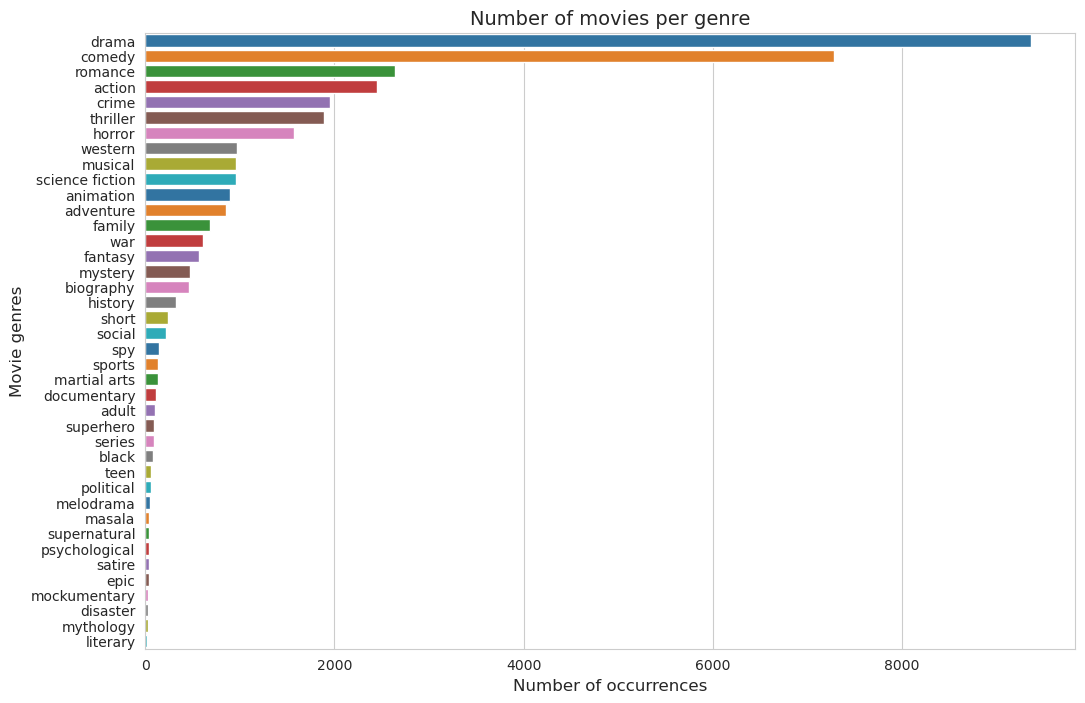

In [6]:
# Print the number of remaining genres
sum_genres = movies_df['Genre'].nunique()
print("Number of genres remaining:", sum_genres)

# Count the occurrences of each genre in descending order
genre_order = movies_df['Genre'].value_counts().index

# Set up the plot
plt.figure(figsize=(12,8))

sns.set_style("whitegrid")
sns.countplot(data=movies_df, y='Genre', order=genre_order, palette="tab10")

plt.title('Number of movies per genre',fontsize=14)
plt.xlabel('Number of occurrences',fontsize=12)
plt.ylabel('Movie genres',fontsize=12)
plt.show()

Για την καλύτερη κατανόηση των πλοκών από τον αλγόριθμο ταξινόμησης, "καθαρίζουμε" τα κείμενα των πλοκών αφαιρώντας σημεία στίξης και ειδικούς χαρακτήρες, αλφαριθμητικά, και μετατρέποντας όλα τα κεφαλαία σε πεζά γράμματα.

In [7]:
# Function for text cleaning
def clean_text(text):
    # Remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # Remove everything alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # Remove whitespaces
    text = ' '.join(text.split())
    # Convert text to lowercase
    text = text.lower()
    
    return text

# Apply text-cleaning function to our dataset
movies_df['Clean Plot'] = movies_df['Plot'].apply(lambda x: clean_text(x))

# Check 3 random entries for plot changes
movies_df[['Plot', 'Clean Plot']].sample(3)

,Plot,Clean Plot
11688,"Lawrence ""Larry the Liquidator"" Garfield (Dann...",lawrence larry the liquidator garfield danny d...
25723,Raja (Ajay Devgn) and Madhu (Karisma Kapoor) m...,raja ajay devgn and madhu karisma kapoor meet ...
23497,Bud Gay and Bud Yan travel back in time to the...,bud gay and bud yan travel back in time to the...


Στη συνέχεια, δημιουργούμε μία συνάρτηση για να εξετάζουμε τις πιο συχνές λέξεις που εμφανίζονται στις περιγραφές των πλοκών των ταινιών.

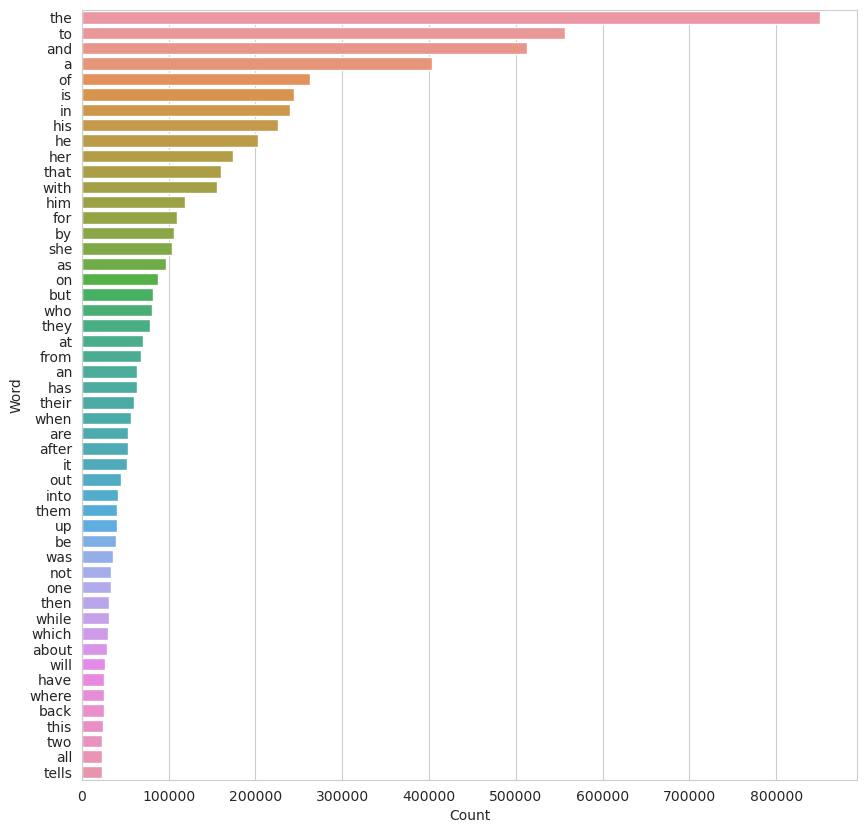

In [8]:
# Function for most frequent terms in plots
def freq_words(x, terms = 20):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = nltk.FreqDist(all_words)
  movies_df = pd.DataFrame({'Word':list(fdist.keys()),'Count':list(fdist.values())})
  
  # Select top 20 most frequent words
  d = movies_df.nlargest(columns="Count", n=terms) 
  plt.figure(figsize=(10,10))
  ax = sns.barplot(data=d, x="Count", y="Word")
  ax.set(ylabel='Word')
  plt.show()

# Print top 50 most frequent words    
freq_words(movies_df['Clean Plot'], 50)

Όπως είναι αναμενόμενο, οι λέξεις με τις περισσότερες εμφανίσεις είναι κυρίως άρθρα, προθέσεις, κλπ. Το σύνολο των λέξεων αυτών στην αγγλική ονομάζονται **stopwords** και επιλέγουμε να το αφαιρέσουμε ώστε να μην παρέμβει στην ανάλυση των κειμένων των πλοκών.

[nltk_data] Downloading package stopwords to /home/olga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


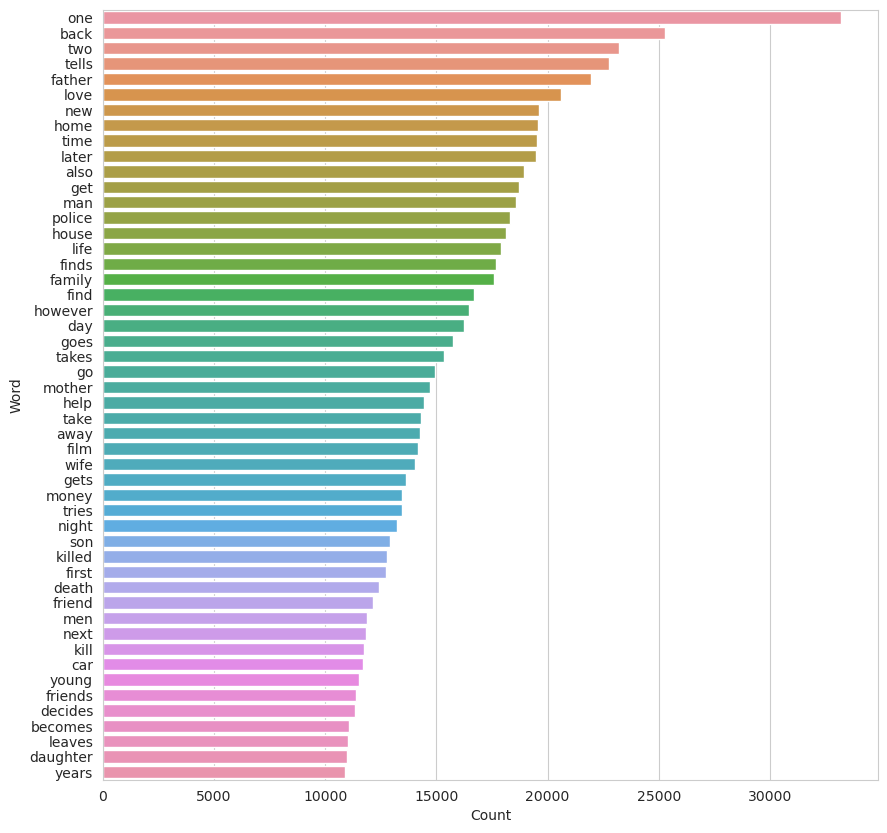

In [9]:
# Download the stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_df['Clean Plot'] = movies_df['Clean Plot'].apply(lambda x: remove_stopwords(x))

# Print updated top 50 most frequent words    
freq_words(movies_df['Clean Plot'], 50)

Για τη γρηγορότερη επεξεργασία του συνόλου δεδομένων της εργασίας, απομακρύνουμε τις στήλες με δεδομένα που δεν αφορούν το παρόν πρόβλημα.

In [10]:
# Remove unnecessary columns
movies_df.drop(columns = ['Release Year', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page', 'Count'], axis = 1, inplace = True)

# Merge the genres for each movie into a single cell
movies_df = movies_df.groupby('Plot').agg({'Genre': ', '.join, 'Title': 'first', 'Clean Plot': 'first'}).reset_index()

# Remove leading newline characters from the plot column
movies_df['Plot'] = movies_df['Plot'].str.lstrip('\r\n')

# Reorder the columns
movies_df = movies_df[['Title', 'Genre', 'Plot', 'Clean Plot']]

# Display the first few rows of the merged dataset
movies_df.head()

,Title,Genre,Plot,Clean Plot
0,Why Did I Get Married?,"drama, comedy",Dianne falls asleep not long after arriving wi...,dianne falls asleep long arriving blackberry c...
1,Close My Eyes,drama,"In 1985, town planning student Richard Gillesp...",town planning student richard gillespie walks ...
2,Born to the West,western,"On the vast mountainous Montana vista, to the ...",vast mountainous montana vista soft strains ri...
3,If I Were Free,drama,"Unhappily married, a man and a woman try to ma...",unhappily married man woman try maintain succe...
4,Nobody Walks,"comedy, drama",23-year-old Martine (Olivia Thirlby) has just...,year old martine olivia thirlby arrived silver...


### 3. Εξαγωγή Χαρακτηριστικών (Feature Extraction)

80% training set, 20% test set

In [13]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(movies_df, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training data
train_features = vectorizer.fit_transform(train_data['Clean Plot'])

# Transform the testing data using the fitted vectorizer
test_features = vectorizer.transform(test_data['Clean Plot'])

# Print the shape of the training and testing features
print("Training features shape:", train_features.shape)
print("Testing features shape:", test_features.shape)
print(train_data.sample(3), test_data.sample(3))

Training features shape: (22445, 119839)
Testing features shape: (5612, 119839)
                        Title          Genre  \
23943         The Beachcomber  comedy, drama   
885         The Frozen Limits         comedy   
16057  Nancy Drew... Reporter        mystery   

                                                    Plot  \
23943  The new British Resident of the Welcome Island...   
885    A group of British pioneers decide to take par...   
16057  Nancy Drew, competing in the local newspaper's...   

                                              Clean Plot  
23943  new british resident welcome islands ewart gra...  
885    group british pioneers decide take part alaska...  
16057  nancy drew competing local newspapers amateur ...                Title     Genre  \
6633  Testosterone    action   
2974         Glory   musical   
5601       Phantom  thriller   

                                                   Plot  \
6633  Dean Seagrave (David Sutcliffe) is a thirty-so...   
297

### 4. Κατασκευή και Εκπαίδευση του Μοντέλου Πρόβλεψης (Building and Training of Prediciton Model)

In [14]:
# Convert the 'Genre' column into a list of lists
label_binarizer = MultiLabelBinarizer()
train_labels = label_binarizer.fit_transform(train_data['Genre'].str.split(', '))
test_labels = label_binarizer.transform(test_data['Genre'].str.split(', '))

# Initialize the LinearSVC classifier
classifier = LinearSVC()

# Initialize the OneVsRestClassifier with the LinearSVC
model = OneVsRestClassifier(classifier)

# Fit the model on the training features and labels
model.fit(train_features, train_labels)

OneVsRestClassifier(estimator=LinearSVC())

### 5. Αξιολόγηση του Μοντέλου (Evaluation of Model)

In [15]:
# Predict the labels for the testing features
predictions = model.predict(test_features)

# Inverse transform the predicted labels to their original genre representation
predicted_labels = label_binarizer.inverse_transform(predictions)
actual_labels = label_binarizer.inverse_transform(test_labels)

# Print the classification report
print(classification_report(test_labels, predictions, target_names=label_binarizer.classes_))

                 precision    recall  f1-score   support

         action       0.61      0.26      0.36       476
          adult       1.00      0.12      0.22        24
      adventure       0.58      0.13      0.21       160
      animation       0.93      0.36      0.52       184
      biography       1.00      0.01      0.02        99
          black       0.00      0.00      0.00        14
         comedy       0.66      0.50      0.57      1488
          crime       0.46      0.19      0.27       375
       disaster       0.00      0.00      0.00         6
    documentary       0.00      0.00      0.00        31
          drama       0.57      0.47      0.52      1872
           epic       0.00      0.00      0.00         6
         family       0.33      0.02      0.04       130
        fantasy       0.68      0.21      0.32       112
        history       1.00      0.03      0.05        73
         horror       0.80      0.50      0.62       304
       literary       0.00    

/home/olga/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/olga/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
f1 = f1_score(test_labels, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.2758374910905203
Precision: 0.612606101511934
Recall: 0.35155718754249965
F1-score: 0.42358500520967574


/home/olga/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. Συμπερασματική Συνάρτηση (Inference Function)

In [17]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = vectorizer.transform([q])
    q_pred = model.predict(q_vec)
    return label_binarizer.inverse_transform(q_pred)

In [18]:
for i in range(10):
    k = test_data.sample(1).index[0]
    print("Movie:", movies_df['Title'][k])
    print("Predicted genre:", infer_tags(test_data['Plot'][k]))
    print("Actual genre:",movies_df['Genre'][k])
    print()

Movie: Parts: The Clonus Horror
Predicted genre: [()]
Actual genre: science fiction

Movie: Don't Be a Menace to South Central While Drinking Your Juice in the Hood
Predicted genre: [()]
Actual genre: comedy

Movie: The Last Emperor
Predicted genre: [('drama',)]
Actual genre: biography

Movie: Dixie
Predicted genre: [('comedy', 'musical')]
Actual genre: musical, biography

Movie: Two of a Kind
Predicted genre: [('comedy',)]
Actual genre: comedy

Movie: Till We Meet Again
Predicted genre: [()]
Actual genre: drama, war

Movie: A Blind Bargain
Predicted genre: [('drama',)]
Actual genre: horror

Movie:  The 40-Year-Old Virgin
Predicted genre: [()]
Actual genre: comedy

Movie: A Boy Called Dad
Predicted genre: [('drama',)]
Actual genre: drama

Movie: World War Z
Predicted genre: [('horror',)]
Actual genre: action, adventure



## Αναφορές

[1] Tasoulis, S. (2022-2023). *E-class material*. Undergraduate Course: "Deep Leanring", 8th Semester, Department of Computer Science and Biomedical Informatics, University of Thessaly, Lamia.

[2] Wikipedia Movie Plots. (2018, October 15). *Kaggle*. https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots

[3] Abimbola, W. (2021, June 24). Text Classification of Movie Plot Summaries to Predict Movie Genres. *GitHub*. https://github.com/Wonuabimbola/movie-genre-prediction/tree/main

[4] Jallouli, A. (2018, December 10). Genre classification based on wiki movies plots. *Kaggle*. https://www.kaggle.com/code/aminejallouli/genre-classification-based-on-wiki-movies-plots/notebook?scriptVersionId=8291374

[5] Rahul, A. (2023, April 13). Movie Genre Classification. *Kaggle*. https://www.kaggle.com/code/adityarahul/movie-genre-classification

[6] Gupta, K. (2021, December 10). Predicting Movie Genres Based on Plot Summaries. *Medium*. https://medium.com/@kunalgupta4595/predicting-movie-genres-based-on-plot-summaries-bae646e70e04

[7] Joshi, P. (2022, July 19). Predicting Movie Genres using NLP – An Awesome Introduction to Multi-Label Classification. *Analytics Vidhya*. https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/

[10] Kothari, M. (2023). Feature Extraction Techniques NLP. *GeeksforGeeks*. https://www.geeksforgeeks.org/feature-extraction-techniques-nlp/

[11] Leung, K. (2022, September 13). Micro, Macro & Weighted Averages of F1 Score, Clearly Explained. *Medium*. https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

[12] Kollaros, G. (2020, October). *Linear Machine Learning Model Comparison for Multi-class Text Classification*. School of Applied Mathematical and Physical Sciences, National Technical University of Athens, Athens. https://dspace.lib.ntua.gr/xmlui/bitstream/handle/123456789/52629/George_Kollaros_NTUA_Thesis%20.pdf?sequence=3

[13] Goyal, S. (2019, December 31). Wiki movie plots EDA. *Kaggle*. https://www.kaggle.com/code/shwetagoyal4/wiki-movie-plots-eda?scriptVersionId=17246825

